In [1]:
import Diagrams.Backend.Cairo.CmdLine

A representation of Vogel's model for the floret pattern of a sunflower head. Vogel, H (1979). "A better way to construct the sunflower head". Mathematical Biosciences 44 (44): 179–189. doi:10.1016/0025-5564(79)90080-4.



In [2]:
{-# LANGUAGE NoMonomorphismRestriction #-}
import           Diagrams.Prelude
import           Data.Colour.Palette.BrewerSet

The n florets of the sunflower are positioned at radii proportional to the square root of n and rotated by a factor 2.4 radians in accordance with Vogel's model.



In [3]:
mkCoords :: Int -> [P2 Double]
mkCoords n =[coord (fromIntegral i) | i <- [1..n]]
  where
    coord m = p2 $ fromPolar (sqrt m) (2.4 * m)
    fromPolar r theta = (r * cos theta, r * sin theta)

The color of each floret is based on it's radius.



In [4]:
floret :: Double -> Diagram B
floret r = circle 0.6 # lw none # fc (colors !! n)
  where
    n = floor (1.4 * sqrt r) `mod` 10
    colors = black : (reverse $ brewerSet YlOrBr 9)

Line 5: Move brackets to avoid $
Found:
black : (reverse $ brewerSet YlOrBr 9)
Why not:
black : reverse (brewerSet YlOrBr 9)

In [5]:
sunflower :: Int ->  Diagram B
sunflower n = frame 4 $ position $ zip (mkCoords n) (florets n)
  where
    florets m = [floret (sqrt (fromIntegral i)) | i <- [1..m]]

In [6]:
example :: Diagram B
example = frame 4 $ sunflower 2000 # bg black

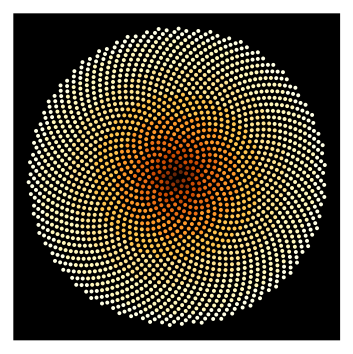

In [7]:
diagram example